In [1]:
#------------------------------------------------------------------------
#  各種設定
#------------------------------------------------------------------------


# 対象の取引所
#exchange, currency, fee = 'Bybit',  'BTCUSD',    -0.025
#exchange, currency, fee = 'Phemex',  'BTCUSD',    -0.025
#exchange, currency, fee = 'Bitflyer','FX_BTC_JPY', 0.0
exchange, currency, fee = 'Gmo',  'BTC_JPY',    None  # Gmoの場合には個別に期間ごとの手数料を採用します

# 対象の特徴量 (作成済みモデルzipを指定すると作成済みモデルでのバックテストを行う事が出来ます)
calclate_features = 'features/richmanbtc.py'
#calclate_features = '20220218_225021_Gmo_BTC_JPY_richmanbtc.zip'

# 読み込んだローソク足のうちこの時間以降のデータを使用する
startdate = '2000-01-01 00:00:00'

# 通知先Discordの指定
webhook = ''

# ログフォルダ
log_folder = 'logs/'

# テンポラリフォルダ
temp_path = 'temp/'


In [2]:
#------------------------------------------------------------------------
# 必要なライブラリのインポート
#------------------------------------------------------------------------
%matplotlib inline

import importlib.machinery as imm
import os
import pandas as pd
import shutil

# 独自ライブラリのインポート
tools = imm.SourceFileLoader('tools', 'libs/tools.py').load_module()
machine_learning = imm.SourceFileLoader('machine_learning', 'libs/machine_learning.py').load_module()

# 初期化処理
if not 'logger' in locals() :
    logger = tools.Logger(log_folder)
discord = tools.NotifyDiscord(logger, webhook)
model = tools.Model(logger, discord)

# tempフォルダを空にする
try:
    shutil.rmtree(temp_path)
except:
    pass
try:
    if not os.path.exists(temp_path):
        os.makedirs(temp_path)
except:
    pass

2022-02-23 08:11:38.661: 読込済みローソク足データ : Gmo_BTC_JPY
[2018-09-05 17:05:00+09:00 ~ 2022-02-23 07:58:00+09:00]  60秒足  1823934 本 (1266.6日)
2022-02-23 08:11:38.669: 特徴量作成ファイルを読み込みました: features/richmanbtc.py
2022-02-23 08:11:38.847: 変換済みローソク足データ : [2018-09-05 17:00:00+09:00 ~ 2022-02-23 07:45:00+09:00]  900秒足  121596 本 (1266.6日)
2022-02-23 08:11:39.408: --------------------------------------------------------------------------------
2022-02-23 08:11:39.408: 指値位置の有効性評価（すべてエントリーした場合の結果）
2022-02-23 08:11:39.408: 
2022-02-23 08:11:39.408: 　買い指値のエントリー回数(毎回)： 121596 (96.0回/日)　約定回数 : 57.1回/日 　約定率 : 59.5%
2022-02-23 08:11:39.416: 　売り指値のエントリー回数(毎回)： 121596 (96.0回/日)　約定回数 : 57.2回/日 　約定率 : 59.6%
2022-02-23 08:11:39.416: 
2022-02-23 08:11:39.416: 　買いエントリーからの利益率 : +1023.7 %  (+0.808 %/日)
2022-02-23 08:11:39.416: 　売りエントリーからの利益率 : +554.1 %  (+0.437 %/日)
2022-02-23 08:11:39.416: 
2022-02-23 08:11:39.424: 　合計利益率 : +1577.9 %  (+1.246 %/日)
2022-02-23 08:11:39.424: 
2022-02-23 08:11:39.424: --------------------

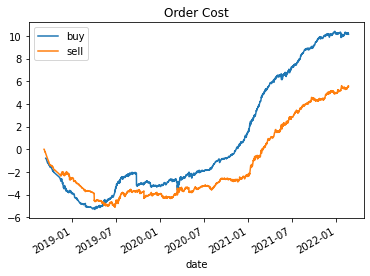

2022-02-23 08:11:39.757: --------------------------------------------------------------------------------
2022-02-23 08:11:39.757: 特徴量の計算
2022-02-23 08:11:40.203: 　　相違あり(num_of_candleが不足）： AD, [-1985.3685781026743, 439941.5946925472]
2022-02-23 08:11:40.203: 　　相違あり(num_of_candleが不足）： OBV, [-2346.6399999999826, 35749.7399999979]
2022-02-23 08:11:40.211: 計算済み特徴量 : ['MOM', 'AD', 'STOCH_slowk', 'BBANDS_upperband', 'TRANGE', 'BBANDS_middleband', 'ADOSC', 'TEMA', 'STOCH_slowd', 'MINUS_DM', 'STOCHF_fastd', 'TRIX', 'NATR', 'APO', 'ATR', 'EMA', 'HT_SINE_leadsine', 'DEMA', 'LINEARREG', 'CORREL', 'TRIMA', 'HT_PHASOR_inphase', 'DX', 'STOCHRSI_fastd', 'PLUS_DI', 'MACD_macd', 'LINEARREG_ANGLE', 'T3', 'MA', 'HT_TRENDLINE', 'CCI', 'MACD_macdhist', 'ADX', 'HT_SINE_sine', 'AROON_aroondown', 'MFI', 'HT_TRENDMODE', 'LINEARREG_INTERCEPT', 'KAMA', 'MINUS_DI', 'STOCHF_fastk', 'STOCHRSI_fastk', 'SMA', 'BBANDS_lowerband', 'PLUS_DM', 'HT_PHASOR_quadrature', 'HT_DCPERIOD', 'BETA', 'LINEARREG_SLOPE', 'WILLR', 'UL

In [3]:
# ローソク足データの読込
df_org = machine_learning.load_candles(logger, exchange, currency, fee, startdate)

# ロジックファイル(特徴量ファイル)を読み込む
discord.send( "-"*80 + f"\n{calclate_features}" )
logic = tools.load_logic_file(calclate_features,logger)

# 指値位置の計算
df, target, ref_maker_cost = machine_learning.calc_limit_price(logger, discord, logic, df_org, model, imgfile=temp_path+"order_cost.png")

# 特徴量の計算
df,features = machine_learning.calc_features(logger, logic, df)

2022-02-23 08:11:44.885:     Value            Feature
0       0    AROON_aroondown
1       0      AROON_aroonup
2       0  BBANDS_middleband
3       0   BBANDS_upperband
4       0                BOP
..    ...                ...
57     83               TRIX
58    240                ATR
59    284               NATR
60    956                OBV
61   1135                 AD

[62 rows x 2 columns]
2022-02-23 08:11:44.901: 削除特徴量 : ['ATR', 'NATR', 'OBV', 'AD']


48.38709677419355


2022-02-23 08:11:46.833: scores : 0.9996967940579751


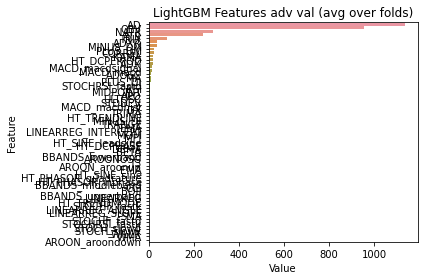

2022-02-23 08:11:49.351:     Value               Feature
0       0       LINEARREG_SLOPE
1       0                   SMA
2       0          STOCHF_fastd
3       1       AROON_aroondown
4       2         AROON_aroonup
5       2            HT_DCPHASE
6       3     HT_PHASOR_inphase
7       3                 TRIMA
8       5     BBANDS_middleband
9       5      HT_SINE_leadsine
10      5                   MOM
11      5        STOCHRSI_fastk
12      5                   WMA
13      7  HT_PHASOR_quadrature
14      7          HT_TRENDLINE
15      7   LINEARREG_INTERCEPT
16      7                    MA
17      8                   RSI
18      9      BBANDS_upperband
19      9                   CCI
20     11          HT_TRENDMODE
21     12             LINEARREG
22     13          HT_SINE_sine
23     13                 WILLR
24     14       LINEARREG_ANGLE
25     16              MIDPOINT
26     17              AROONOSC
27     17           STOCH_slowk
28     17                  TEMA
29     19      

51.724137931034484


2022-02-23 08:11:51.116: scores : 0.8086478552392516
2022-02-23 08:11:52.213:     Value               Feature
0       0       LINEARREG_SLOPE
1       0                   SMA
2       0          STOCHF_fastd
3       4           STOCH_slowk
4       5                   MOM
5       6        STOCHRSI_fastk
6       9     BBANDS_middleband
7      10                    T3
8      10                 TRIMA
9      11                   WMA
10     13          HT_TRENDLINE
11     13             LINEARREG
12     15   LINEARREG_INTERCEPT
13     16                    MA
14     17              AROONOSC
15     17      HT_SINE_leadsine
16     18           STOCH_slowd
17     20       AROON_aroondown
18     21            HT_DCPHASE
19     21                 WILLR
20     24          HT_SINE_sine
21     25      BBANDS_upperband
22     26         AROON_aroonup
23     27                   CCI
24     27       LINEARREG_ANGLE
25     28     HT_PHASOR_inphase
26     29      BBANDS_lowerband
27     29  HT_PHASOR_quadr

55.55555555555556


2022-02-23 08:11:53.369: scores : 0.729770530219066
2022-02-23 08:11:54.210:     Value               Feature
0       0       LINEARREG_SLOPE
1       0                   SMA
2       0          STOCHF_fastd
3       5                   WMA
4      13                    T3
5      14            HT_DCPHASE
6      14                   MOM
7      15     BBANDS_middleband
8      18        STOCHRSI_fastk
9      19   LINEARREG_INTERCEPT
10     19           STOCH_slowd
11     22          HT_TRENDLINE
12     23         AROON_aroonup
13     24      HT_SINE_leadsine
14     25             LINEARREG
15     26       AROON_aroondown
16     28                 TRIMA
17     32          HT_SINE_sine
18     32           STOCH_slowk
19     33          STOCHF_fastk
20     34              AROONOSC
21     35                 WILLR
22     40                    MA
23     41      BBANDS_upperband
24     44     HT_PHASOR_inphase
25     45      BBANDS_lowerband
26     46                   CCI
27     48  HT_PHASOR_quadra

61.224489795918366


2022-02-23 08:11:55.195: scores : 0.70292247581384
2022-02-23 08:11:56.096:     Value               Feature
0       0       LINEARREG_SLOPE
1       0                   SMA
2       0          STOCHF_fastd
3      10                   WMA
4      16   LINEARREG_INTERCEPT
5      17     BBANDS_middleband
6      18          HT_TRENDLINE
7      18                   MOM
8      19                    T3
9      20           STOCH_slowd
10     21                 TRIMA
11     22        STOCHRSI_fastk
12     25         AROON_aroonup
13     25             LINEARREG
14     30       LINEARREG_ANGLE
15     30                 WILLR
16     31            HT_DCPHASE
17     31           STOCH_slowk
18     32       AROON_aroondown
19     34          HT_SINE_sine
20     36      HT_SINE_leadsine
21     37              AROONOSC
22     40          STOCHF_fastk
23     41                   CCI
24     41     HT_PHASOR_inphase
25     42                    MA
26     50          HT_TRENDMODE
27     54                  B

65.21739130434783


2022-02-23 08:11:57.035: scores : 0.6968863487217969
2022-02-23 08:11:57.844:     Value               Feature
0       0       LINEARREG_SLOPE
1       0                   SMA
2       0          STOCHF_fastd
3       8                   WMA
4      11                    T3
5      22           STOCH_slowd
6      26     BBANDS_middleband
7      26          HT_TRENDLINE
8      28         AROON_aroonup
9      29       LINEARREG_ANGLE
10     29   LINEARREG_INTERCEPT
11     33            HT_DCPHASE
12     33             LINEARREG
13     34                   MOM
14     34        STOCHRSI_fastk
15     35       AROON_aroondown
16     35                 TRIMA
17     37          HT_SINE_sine
18     39              AROONOSC
19     39           STOCH_slowk
20     42                   CCI
21     43          STOCHF_fastk
22     43                 WILLR
23     44      HT_SINE_leadsine
24     48     HT_PHASOR_inphase
25     57          HT_TRENDMODE
26     60  HT_PHASOR_quadrature
27     62                 

68.18181818181819


2022-02-23 08:11:58.743: scores : 0.6863518880221707


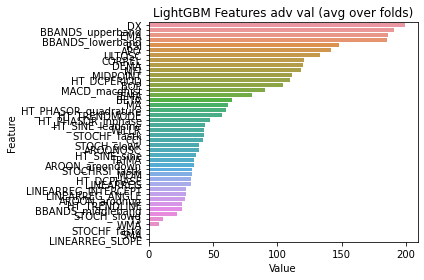

2022-02-23 08:11:59.293: 重要度を考慮した際に削除した特徴量 : ['ATR', 'NATR', 'OBV', 'AD', 'MINUS_DM', 'PLUS_DM', 'ADOSC', 'TRIX', 'PLUS_DI', 'KAMA', 'STOCHRSI_fastd', 'MINUS_DI', 'TRANGE', 'ADX', 'MACD_macdsignal', 'STDDEV', 'MACD_macd', 'ADXR']
2022-02-23 08:11:59.293: 採用した特徴量 : ['APO', 'AROONOSC', 'AROON_aroondown', 'AROON_aroonup', 'BBANDS_lowerband', 'BBANDS_middleband', 'BBANDS_upperband', 'BETA', 'BOP', 'CCI', 'CORREL', 'DEMA', 'DX', 'EMA', 'HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR_inphase', 'HT_PHASOR_quadrature', 'HT_SINE_leadsine', 'HT_SINE_sine', 'HT_TRENDLINE', 'HT_TRENDMODE', 'LINEARREG', 'LINEARREG_ANGLE', 'LINEARREG_INTERCEPT', 'LINEARREG_SLOPE', 'MA', 'MACD_macdhist', 'MFI', 'MIDPOINT', 'MOM', 'RSI', 'SMA', 'STOCHF_fastd', 'STOCHF_fastk', 'STOCHRSI_fastk', 'STOCH_slowd', 'STOCH_slowk', 'T3', 'TEMA', 'TRIMA', 'ULTOSC', 'WILLR', 'WMA']


In [4]:
# 重要度を考慮した特徴量の削除
if calclate_features.endswith(".py") :
    delete_features = machine_learning.eliminate_features( logger, discord, df, list(set(features)-set(logic['nouse_columns'])),
                                                       repeat= 30, threshold = 3.0, goal = 0.3, imgfile = temp_path+"importance.png" )

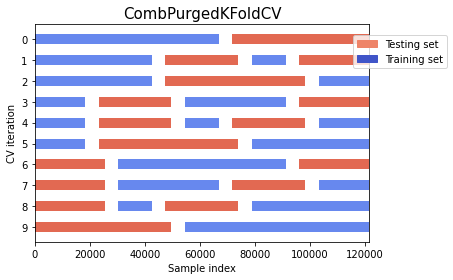

2022-02-23 08:12:27.690: --------------------------------------------------------------------------------
全区間でのクロスバリデーション評価 : 1265.7日 +1724.8 %  (+1.363 %/日)

2022-02-23 08:12:27.706: 　y_buy : +943.8 %  (+0.746 %/日)
2022-02-23 08:12:27.770: 　y_sell : +781.0 %  (+0.617 %/日)
2022-02-23 08:12:27.870: 


クロスバリデーションの結果に沿ったバックテスト(ポジション上限無し）


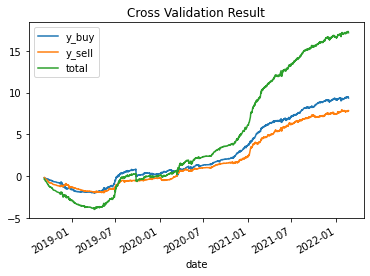

クロスバリデーションの結果に沿ったバックテスト(ポジションを上限１に制限した場合）


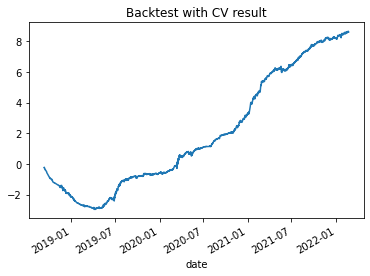

ポジションの平均の推移です。どちらかに偏りすぎていないかなどを確認できます。


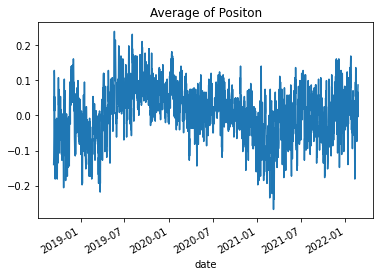

2022-02-23 08:12:29.021: t検定 （p値は小さいほうが良い結果です）
2022-02-23 08:12:29.021: t検定 :  t値 7.175911  p値 0.0000000000007224


全区間でのクロスバリデーションの結果 :  1.363%/日
参考：ルールベースでの指値コスト     :  1.246%/日
CV評価の結果はルールベースでの指値コストよりも増えていないと予測が効果的でないと考えられるので特徴量や削除条件を見直す


In [5]:
# 全区間のクロスバリデーションによる評価
if calclate_features.endswith(".py") :
    from sklearn.model_selection import KFold, TimeSeriesSplit
    profit_per_day = machine_learning.cross_validation(logger, discord, model, df,
                          # 採用する特徴量は、事前にロジックファイルで削除するよう指定されているものと、重要度によって削除することにしたものを除く
                          features = list(set(features) - set(logic['nouse_columns']) - set(delete_features)),
                          y = target,
                          #------------------------------
                          # バリデーションモデルを指定することが出来ます
#                          cvmodel = KFold(),
#                          cvmodel = TimeSeriesSplit(),
                          cvmodel = tools.CombPurgedKFoldCV(n_splits=5, n_test_splits=2, time_gap=int(len(df)/35), embargo_td=pd.Timedelta('500min')),
                          #------------------------------
                          image_path = temp_path )

    print( "全区間でのクロスバリデーションの結果 :  {:.3f}%/日".format(profit_per_day))
    print( "参考：ルールベースでの指値コスト     :  {:.3f}%/日".format(ref_maker_cost))
    print( "CV評価の結果はルールベースでの指値コストよりも増えていないと予測が効果的でないと考えられるので特徴量や削除条件を見直す" )

2022-02-23 08:12:43.118: 40%の学習区間での評価 : 評価区間での利益率 : +2.218 %/日
2022-02-23 08:12:44.718: 50%の学習区間での評価 : 評価区間での利益率 : +1.940 %/日
2022-02-23 08:12:46.032: 60%の学習区間での評価 : 評価区間での利益率 : +2.497 %/日
2022-02-23 08:12:47.829: 70%の学習区間での評価 : 評価区間での利益率 : +2.584 %/日
2022-02-23 08:12:49.592: 80%の学習区間での評価 : 評価区間での利益率 : +2.096 %/日
2022-02-23 08:12:49.593: -------------------- 70%の学習区間での評価を採用
2022-02-23 08:12:51.660: --------------------------------------------------------------------------------
2022-02-23 08:12:51.660: 学習期間 : [2018-09-06 15:00:00+09:00 ~ 2021-02-08 05:15:00+09:00]
2022-02-23 08:12:51.660: 選択特徴量 : ['AD', 'ADOSC', 'ADX', 'ADXR', 'APO', 'AROONOSC', 'AROON_aroondown', 'AROON_aroonup', 'ATR', 'BBANDS_lowerband', 'BBANDS_middleband', 'BBANDS_upperband', 'BETA', 'BOP', 'CCI', 'CORREL', 'DEMA', 'DX', 'EMA', 'HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR_inphase', 'HT_PHASOR_quadrature', 'HT_SINE_leadsine', 'HT_SINE_sine', 'HT_TRENDLINE', 'HT_TRENDMODE', 'KAMA', 'LINEARREG', 'LINEARREG_ANGLE', 'LINEAR

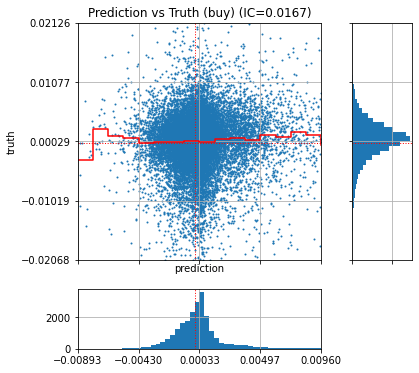

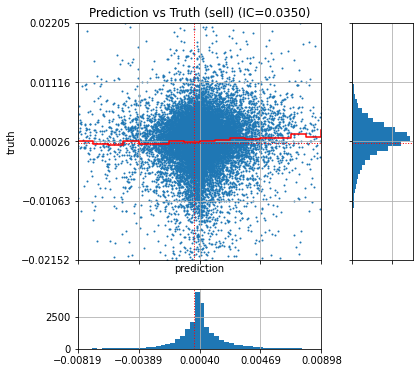

In [6]:
# 最終的なモデルの学習期間と評価期間の検討
if calclate_features.endswith(".py") :
    split_date = machine_learning.decide_period(logger, discord, df, model, features, target)
    logic['training period'] = model._training_period = str(df.index[0])+' ~ ' + str(split_date)

    # 学習区間で学習モデルの生成
    msplit_date = logic['training period'][28:]
    model.training( df[:split_date], features, target )

    # 作成したモデルを用いて評価区間を予測し、予測と結果の相関関係をプロット
    machine_learning.evaluation( logger, discord, df, model, logic, target, image_path=temp_path )

全区間でのバックテスト (ポジション上限無し)
    学習区間は良い結果になるのは当然で、学習期間と評価期間に大きな差が無いことを確認する


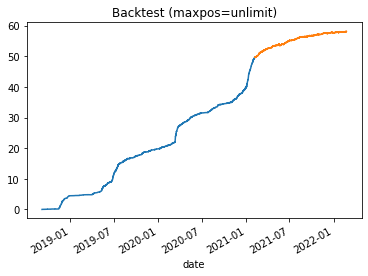

全区間でのバックテスト  (ポジションを上限１に制限した場合）


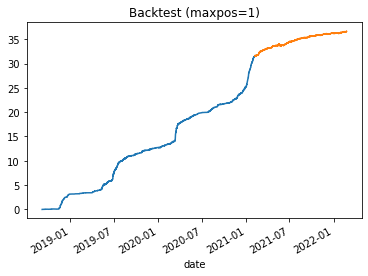

機械学習の結果に沿ってエントリーした場合と、無条件で全区間エントリーした場合の比較


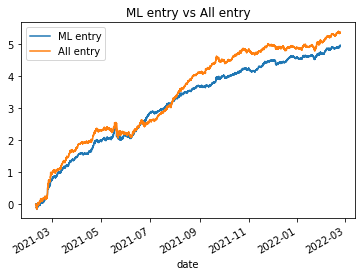

評価期間の詳細なバックテスト  (ポジションを上限１に制限した場合）
    最大DD区間や約定頻度を確認


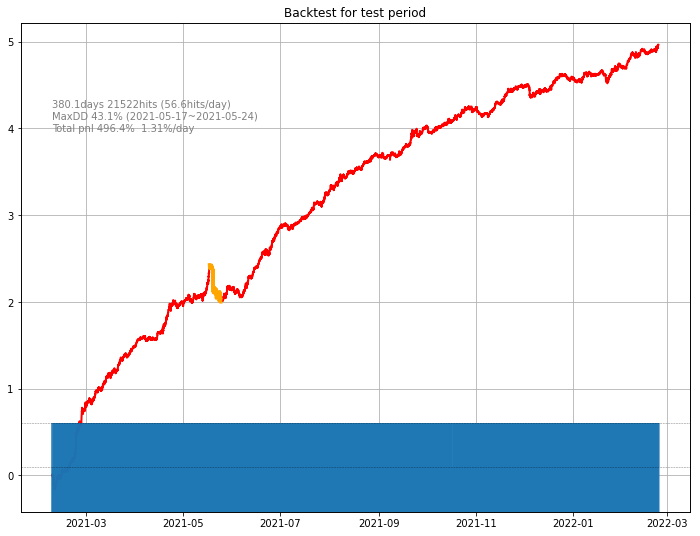

In [7]:
# バックテスト
split_date = logic['training period'][28:]
test_df, predict = model.evaluation( df[split_date:], report=False ) # 学習モデルで検査期間の評価

if calclate_features.endswith(".py") :
    train_df, predict = model.evaluation( df[:split_date], report=False ) # 学習モデルで学習期間の評価
    machine_learning.backtest_maxpos( logger, discord, train_df, test_df, model, logic, predict, image_path=temp_path ) # 全区間でのバックテスト (ポジション上限無し)
    machine_learning.backtest_pos1( logger, discord, train_df, test_df, model, logic, predict, image_path=temp_path )   # 全区間でのバックテスト  (ポジションを上限１に制限した場合）
    machine_learning.backtest_ml_vs_all( logger, discord, test_df, model, logic, predict, image_path=temp_path )        # 機械学習の結果に沿ってエントリーした場合と、無条件で全区間エントリーした場合の比較
    machine_learning.backtest_detail( logger, discord, test_df, model, logic, predict, image_path=temp_path )           # 評価期間の詳細なバックテスト  (ポジションを上限１に制限した場合）

else:
    machine_learning.backtest_ml_vs_all( logger, discord, test_df, model, logic, predict, image_path=temp_path, days=30 )  # 機械学習の結果に沿ってエントリーした場合と、無条件で全区間エントリーした場合の比較
    machine_learning.backtest_detail( logger, discord, test_df, model, logic, predict, image_path=temp_path, days=30 )     # 直近30日の詳細なバックテスト  (ポジションを上限１に制限した場合）


In [8]:
# 完成したモデルを zip ファイルで出力
if calclate_features.endswith(".py") :
    machine_learning.save_model_to_zip(logger, model=model, logic=logic, delete_features=delete_features,
                                       candle_file=exchange+'_'+currency, calclate_features=calclate_features,
                                       temp_path=temp_path)

2022-02-23 08:14:17.445: save model to 20220223_081417_Gmo_BTC_JPY_richmanbtc.zip
